Taking a closer look at employment and earnings trends amongst recent graduates. Focus is on major, major category, and gender. Dataset originially from [FiveThirtyEight.](https://github.com/fivethirtyeight/data/tree/master/college-majors)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.describe()

/home/alexs/anaconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39167.716763,356.080925,16637.358382,22530.358382,0.522550,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068587,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63354.613919,618.361022,28063.394844,40966.381219,0.230572,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.029967,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,2.000000,119.000000,0.000000,0.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4361.000000,39.000000,2110.000000,1784.000000,0.339671,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,NaN,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15058.000000,130.000000,5347.000000,8284.000000,0.535714,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,NaN,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38844.000000,338.000000,14440.000000,22456.000000,0.702020,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,NaN,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,4212.000000,173809.000000,307087.000000,0.968954,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Cleaning the data

Removing rows that contain null values for unemployment rate - present in a single row.

In [5]:
recent_grads.dropna(inplace = True)
recent_grads["ShareMen"] = 1 - recent_grads["ShareWomen"]

## Dataset Summary Stats

In [15]:
agg_set = pd.pivot_table(recent_grads, index="Major_category", values=["Total", "Men", "Women", "Employed", "Unemployed"], aggfunc='sum')
agg_set

,Employed,Men,Total,Unemployed,Women
Major_category,,,,,
Agriculture & Natural Resources,66943,197875,79981,3824,249812
Arts,288114,86781,357130,28228,140469
Biology & Life Science,302797,427803,453862,22854,578132
Business,1088742,176917,1302376,79877,110367
Communications & Journalism,330660,36692,392601,26852,98278
Computers & Mathematics,237894,59623,299008,18373,62599
Education,479839,257712,559129,24969,612958
Engineering,420372,400644,537583,29817,118051
Health,372147,94630,463230,22213,312026


In [16]:
agg_set.sum()

Employed      5396348
Men           2876507
Total         6775891
Unemployed     418025
Women         3896429
dtype: int64

## Comparing gender ratio and unemployment rates

Starting with unemployment rates based on the number of women in each major.

Basic pandas scatter matrix below.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92f8712940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f92cf382c18>]], dtype=object)

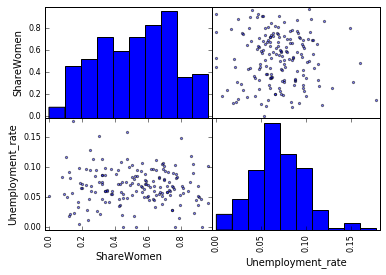

In [6]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[["ShareWomen","Unemployment_rate"]])

The goal of this project is to use lower level Matplotlib objects to build this matrix.

Creating the figure and 4 axes:

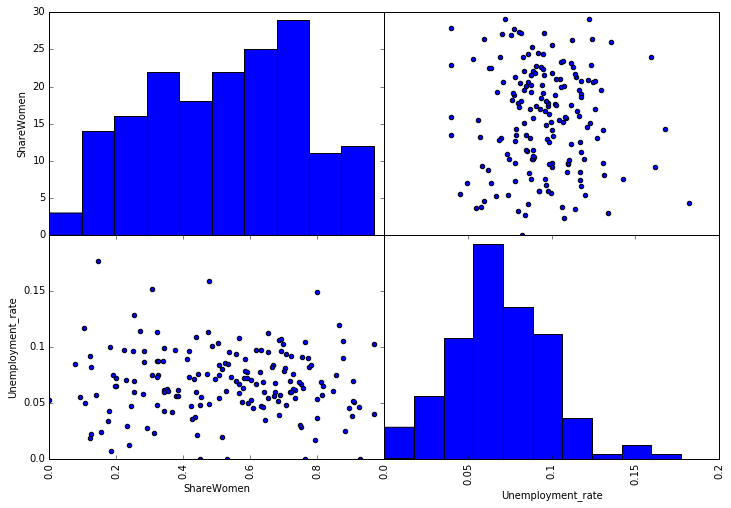

In [7]:
fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax4.yaxis.set_visible(False)

ax1.set(ylabel = "ShareWomen", ylim = (0,30))
ax2.set(ylim = (0.0, 1.0))
ax3.set(ylabel = "Unemployment_rate", xlabel="ShareWomen", xlim = (0.0, 1.0), ylim=(0.0,0.20))
ax4.set(xlabel = "Unemployment_rate", xlim = (0.0,0.20))

ax1.set_yticklabels([0, 5, 10, 15, 20, 25, 30])
ax3.set_yticklabels([0.00, 0.05, 0.10, 0.15])
ax3.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90)
ax4.set_xticklabels([0.00, 0.05, 0.10, 0.15, 0.20], rotation=90)

ax1.hist(recent_grads["ShareWomen"], bins =10)
ax2.scatter(recent_grads['Unemployment_rate'], recent_grads["ShareWomen"])
ax3.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"])
ax4.hist(recent_grads["Unemployment_rate"], bins =10)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0, hspace=0)

plt.show()



### Observations

The unemployment rate across majors clusters around 5% - but this is does not seem affected by the gender of the graduates.

## Understand gender makeup by major category

Majors are grouped by type:

In [8]:
list(recent_grads["Major_category"].unique())

['Engineering',
 'Business',
 'Physical Sciences',
 'Law & Public Policy',
 'Computers & Mathematics',
 'Agriculture & Natural Resources',
 'Industrial Arts & Consumer Services',
 'Arts',
 'Health',
 'Social Science',
 'Biology & Life Science',
 'Education',
 'Humanities & Liberal Arts',
 'Psychology & Social Work',
 'Communications & Journalism',
 'Interdisciplinary']

First taking a look at each major category:

In [9]:
major_gender = pd.pivot_table(recent_grads, index="Major_category", values=["ShareWomen"])
major_gender["ShareMen"] = 1.0 - major_gender["ShareWomen"]
major_gender = major_gender[["ShareMen", "ShareWomen"]]

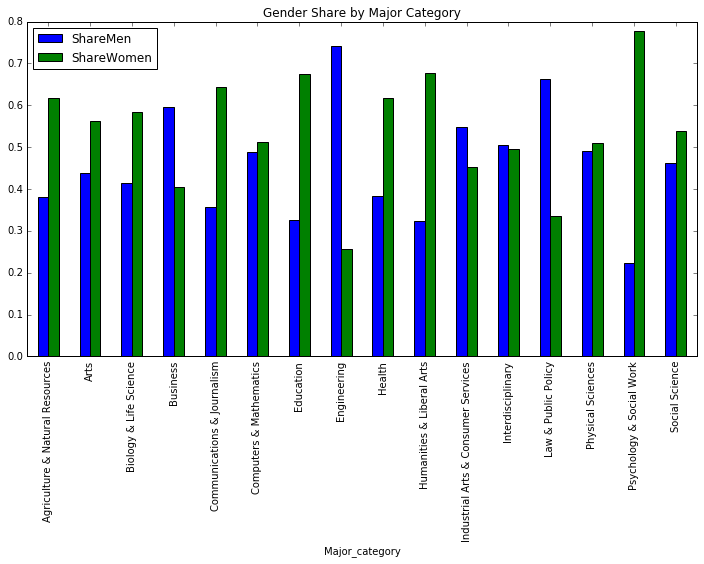

In [10]:
major_gender.plot(kind="bar", figsize = (12,6), title = "Gender Share by Major Category")

And then drilling down into each major specifically. major_bars() takes in the major category and returns the bar charts, built with matplotlib to match the pandas plot used above.

In [11]:
def major_bars(major):

    major_df = recent_grads[recent_grads["Major_category"] == major]
    major_df.set_index("Major", inplace=True)

    fig = plt.figure(figsize = (12,8))

    ax = fig.add_subplot(1,1,1)
    ax.set_xticklabels(major_df.index, rotation=90)

    #Generate the ShareMen bars
    locs = np.arange(0, len(major_df))
    bar_1 = plt.bar(locs, major_df["ShareMen"].tolist(), width = .35)
    
    #Generate the ShareWomen bars
    off_locs = locs + .35
    bar_2 = plt.bar(off_locs, major_df["ShareWomen"].tolist(), width=.35, color = "green")
    
    #Set titles, limits, ticks, legend
    ax.set(title="Gender Share for " + major + " Majors", ylim = (0, .99), xticks = off_locs)
    plt.legend((bar_1, bar_2), ("ShareMen", "ShareWomen"), loc="upper left")
    plt.grid()
    
    plt.show()

In [12]:
unique_maj = recent_grads["Major_category"].unique()
unique_maj.sort()

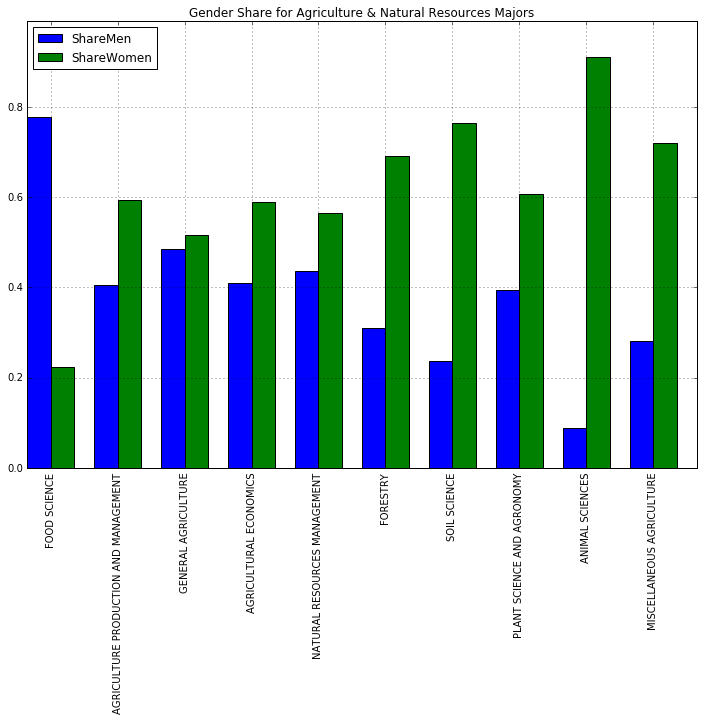

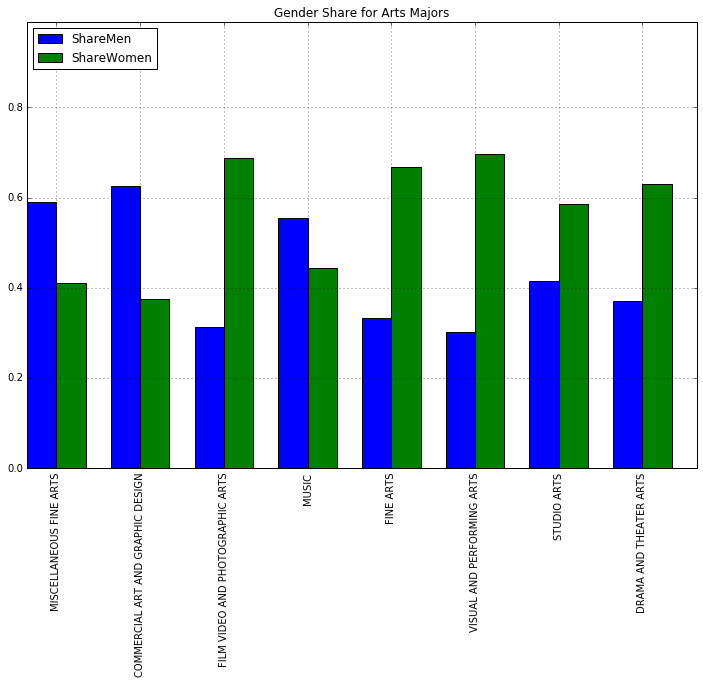

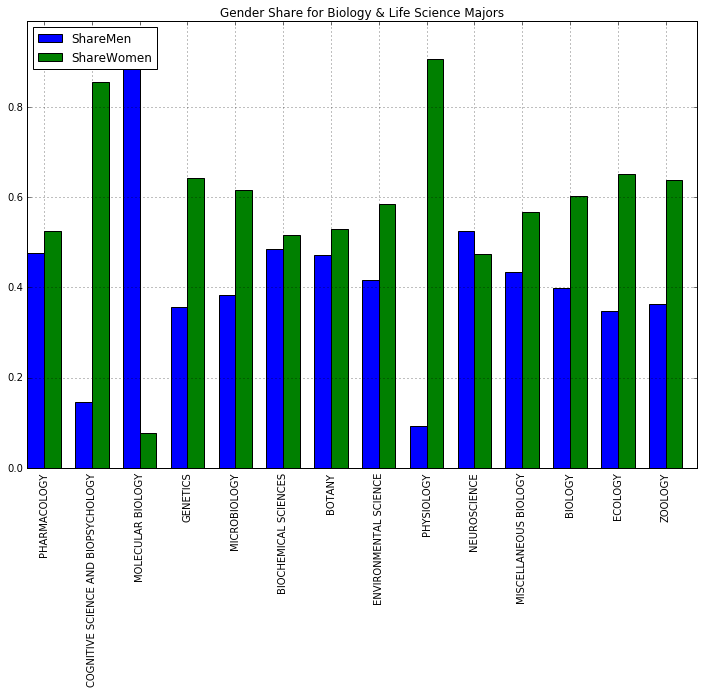

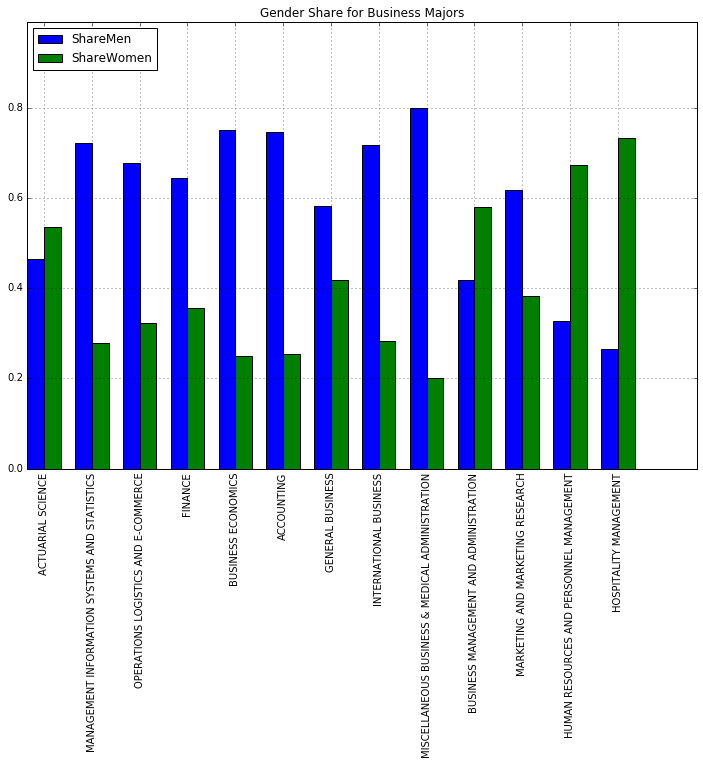

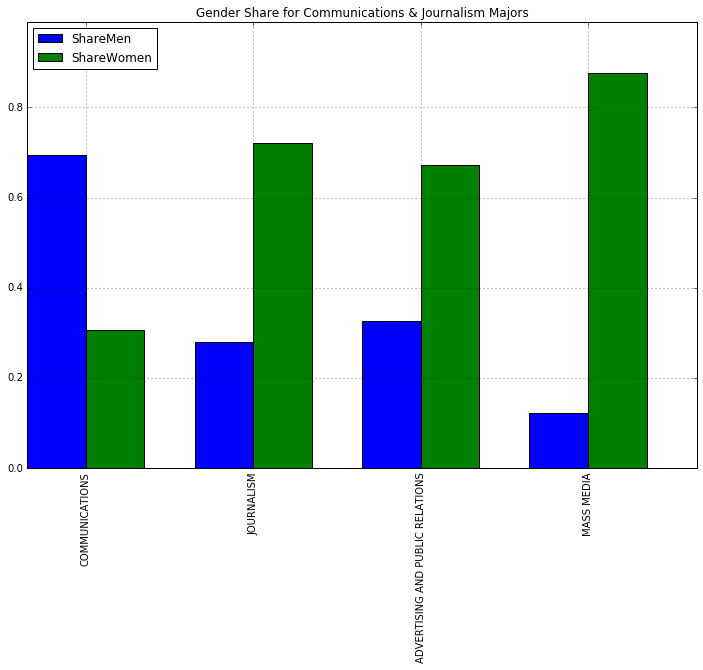

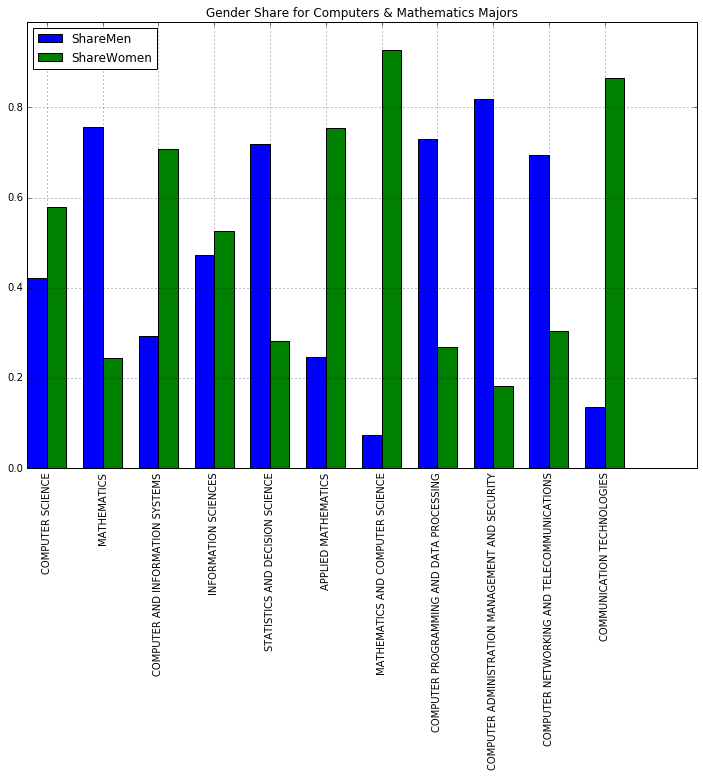

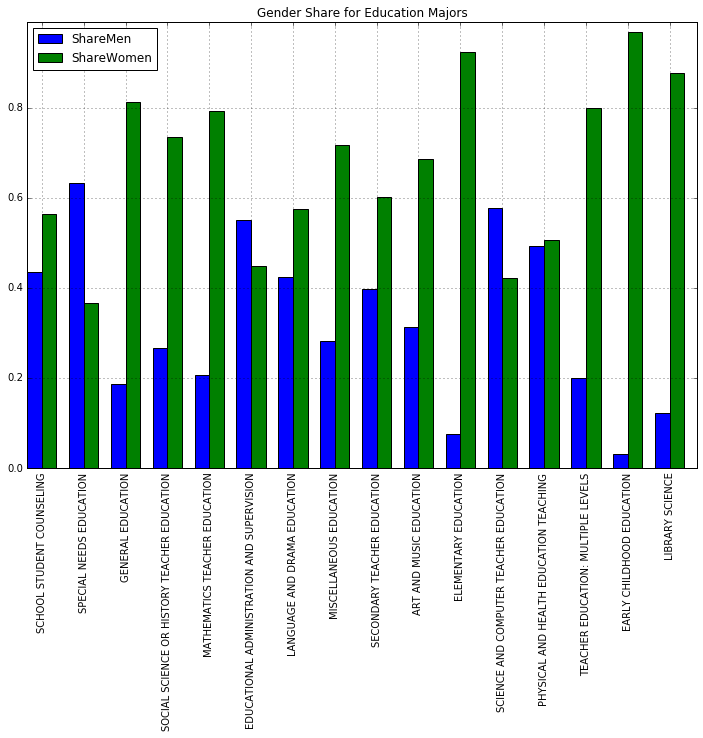

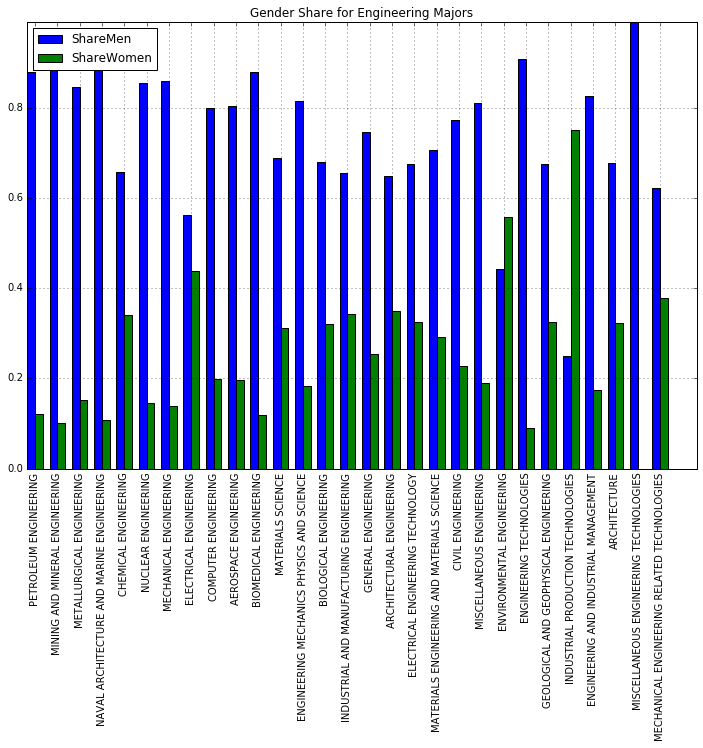

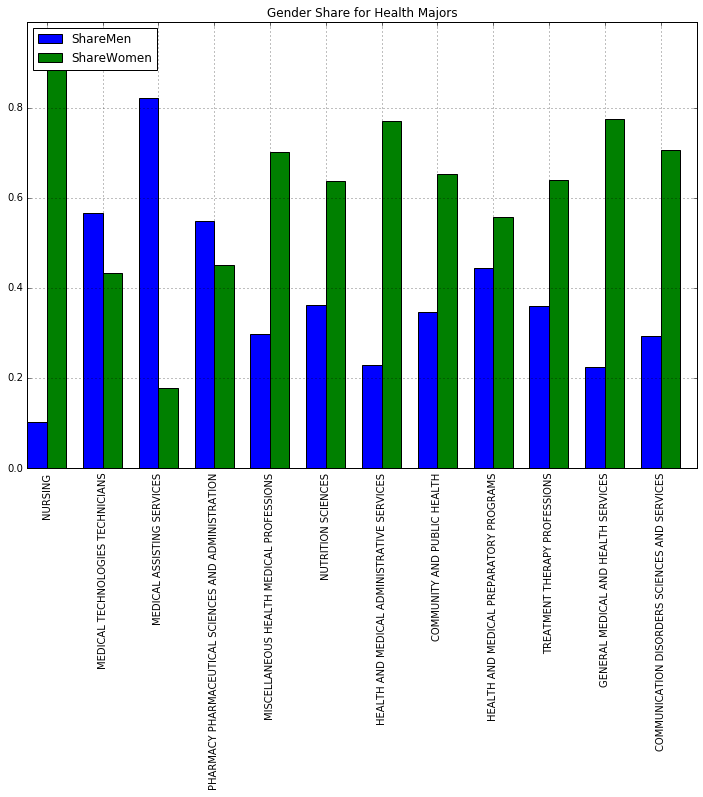

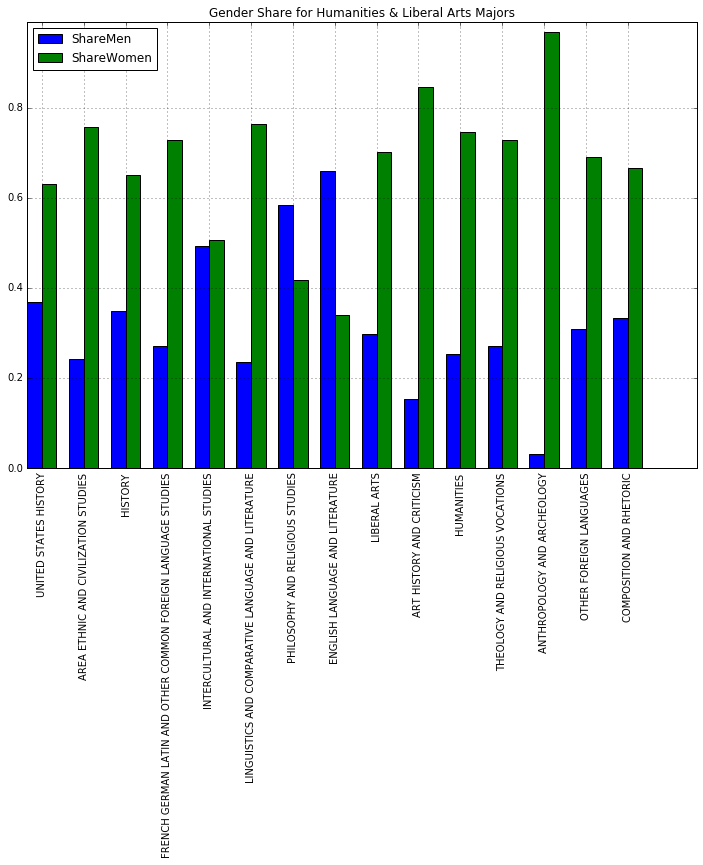

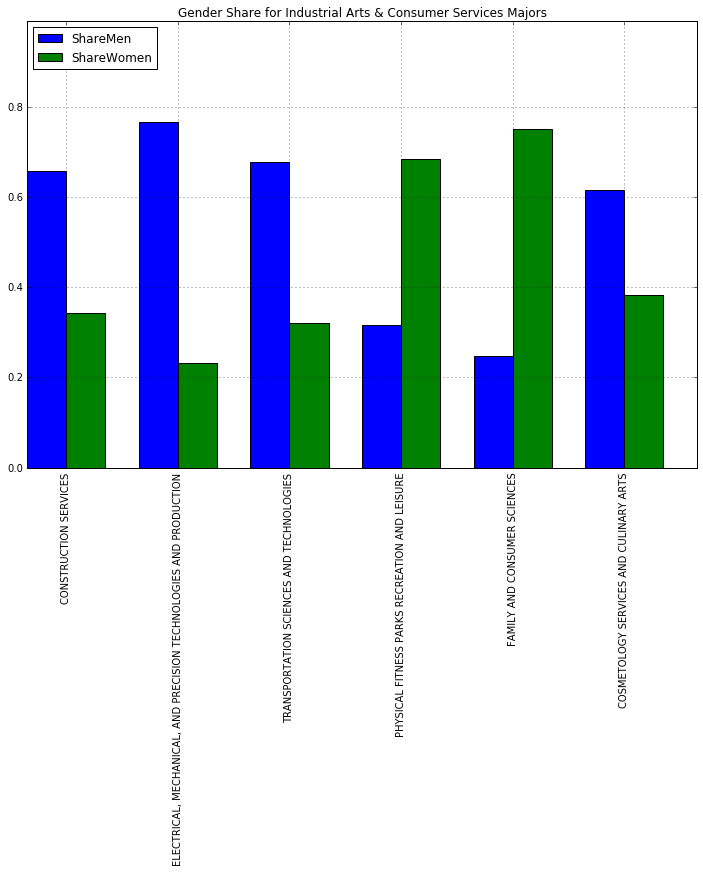

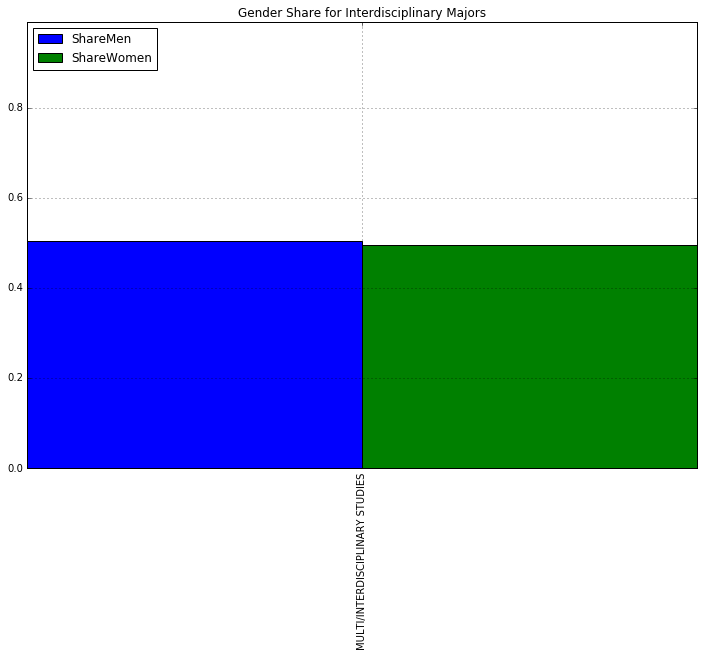

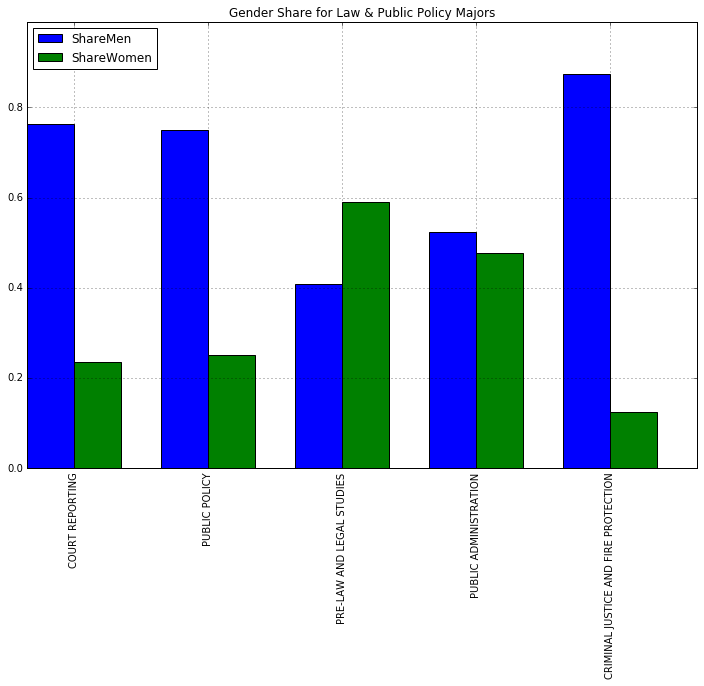

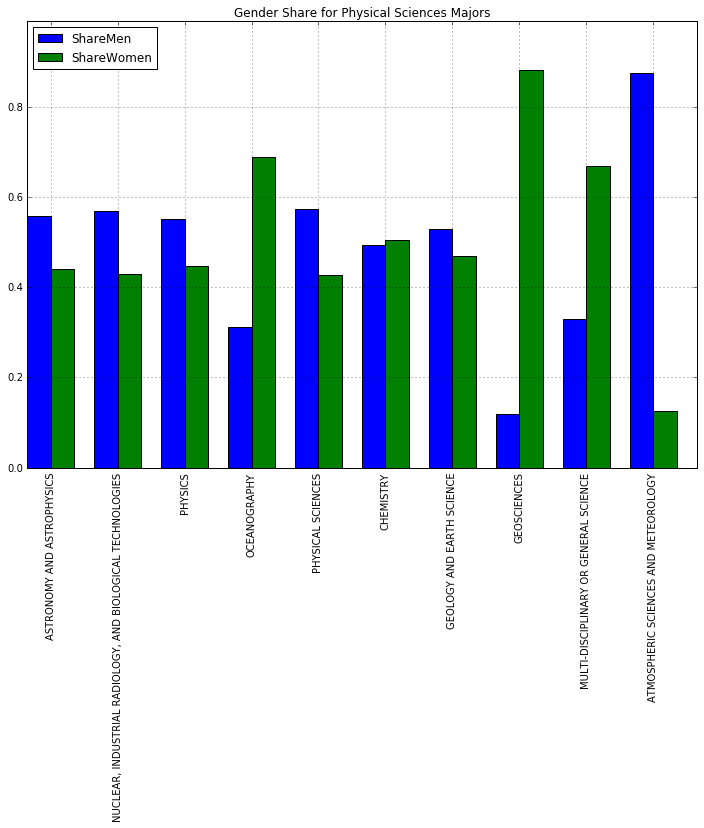

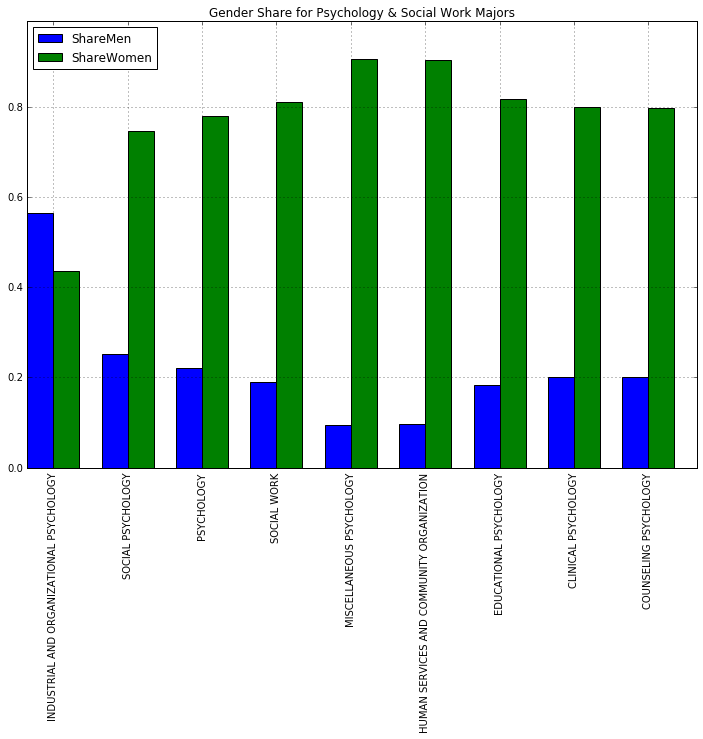

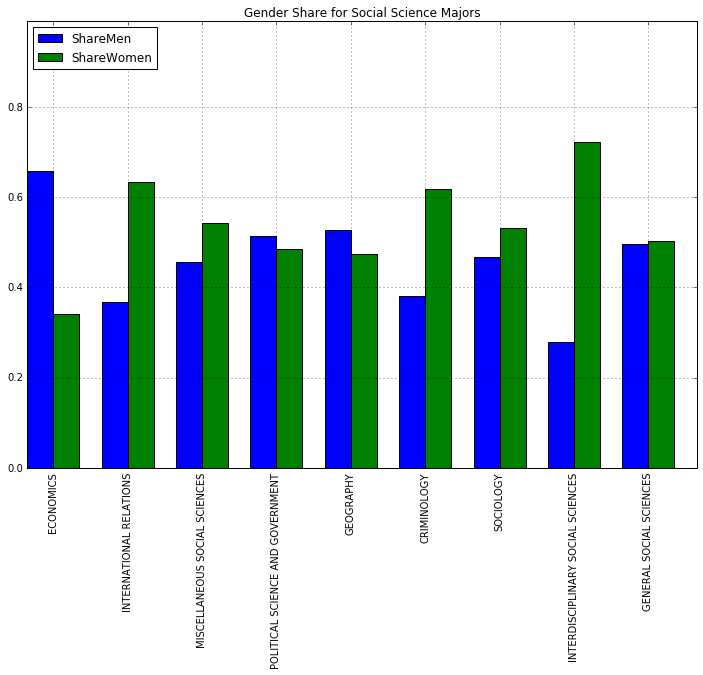

In [13]:
for i in unique_maj:
    major_bars(i)